In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns  
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import PIL
import pickle
from tensorflow.keras import layers

In [ ]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
i = random.randint(1, 50000)
plt.imshow(X_train[i])
y_train[i]

In [ ]:
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_train[i])
    axes[i].set_title("Object Class = {}".format(y_train[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [ ]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims = True)

In [ ]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128

In [ ]:
from tensorflow.keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))
LeNet.summary()

In [ ]:
LeNet.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = LeNet.fit(X_train_gray_norm, y_train, epochs=50, batch_size=500, verbose=1)

In [ ]:
score = LeNet.evaluate(X_test_gray_norm, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.2090 - accuracy: 0.5987


In [ ]:
print('LeNEt Model accuracy on Test Dataset: {}'.format(score[1]))

LeNEt Model accuracy on Test Dataset: 0.5986999869346619


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']


In [ ]:
epochs = range(len(accuracy)) 
epochs

range(0, 50)

In [ ]:
plt.plot(epochs, accuracy, 'b', label = 'Training Accuracy')
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.title('Training Accuracy and Training Loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = LeNet.predict(X_test_gray_norm)
y_true = y_test

In [ ]:
for i in range(len(X_test_gray_norm)):
  print(np.argmax(predicted_classes[i]))

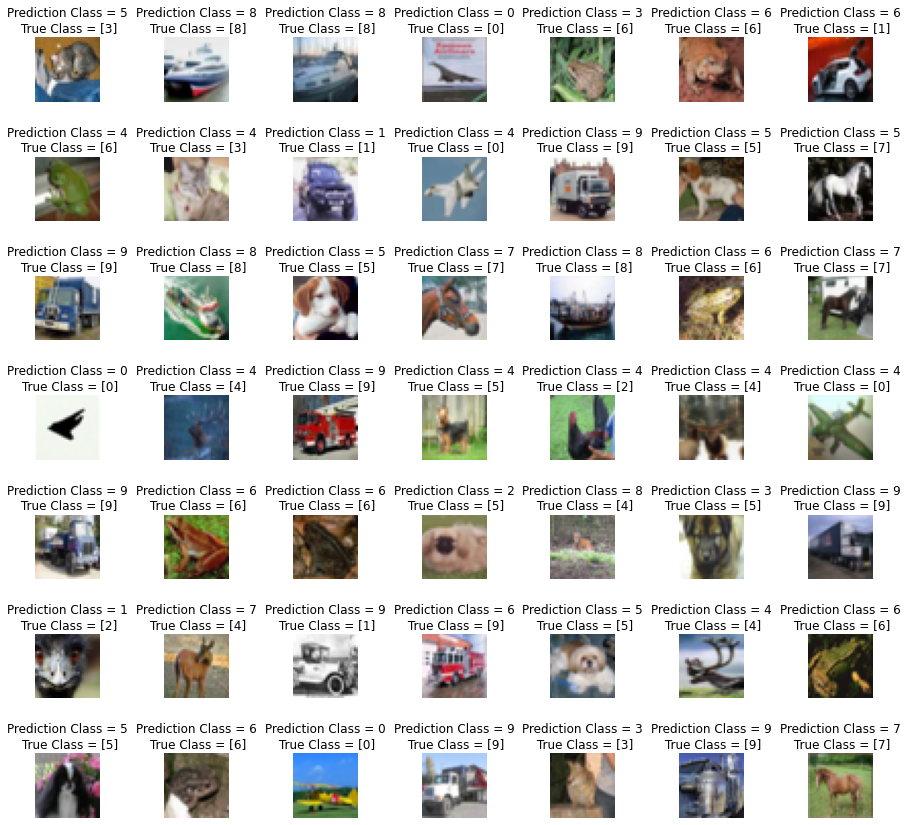

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel() 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(np.argmax(predicted_classes[i]), (y_true[i])))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [ ]:
-